# Convex optimization based low-rank matrix decomposition for image restoration

### Team 9
#### Nikolay Kozyrskiy
#### Nikolay Skuratov
#### Alexey Bauman

## Review of literature

Low rank matrix recovery from corrupted one is an interesting and demanded task, which is close to matrix rank minimization. It has many applications, such as: computer vision and image processing, signal processing, and many other fields. Let's review different examples of solving this problem. 
A patch based robust video restoration method, which groups similar patches in spatial-temporal domain and then formulates the restoration problem as joint sparse and low-rank matrix approximation [2]. If we consider modeling the stable background as low-rank part and foreground variations as sparse part, PCP showes us a good result in video background modelling [3]. A robust alignment method by sparse and low rank decomposition (RASL) is proposed in [4], which simultaneously aligns a batch of linearly correlated images in spite of gross corruption. These techniques has been applied to camera calibration [6], generalized cylindrical surfaces unwrapping [7], urban structuresreconstruction [8], text detection [9], etc. In a recent work [10] on image completion, they correctly repaired the global structure of a corrupted texture by harnessing both low-rank and sparse structures in regular or near regular textures.

 ## Complexity of the problem and its difficulty 

Suppose that the given data are arranged as columns in a large matrix, $D \in R^{m \times n}$. Classical PCA assumes that this data matrix was generated by perturbing a matrix, $A \in R^{m \times n}$, whose columns lie in a subspace of dimension $r << min(m, n)$. In other words, $D = A + E$, where A is a rank-r matrix and E is a matrix whose entries are independent and identically distributed (i.i.d.) Gaussian random variables.

PCA seeks an optimal estimate of A, by the following constrained optimization:

$$\min _ { A , E } \| E \| _ { F }$$

$$\text { s.t. rank } ( A ) \leq r , D = A + E$$

This can be solved by computing the singular value decomposition (SVD) of D. The optimal estimate of low-rank matrix A is simply the projection of the columns of D onto the subspace spanned by the r principal left singular vectors of D.

Although PCA offers an optimal estimate of the subspace for data corrupted by small amounts of Gaussian noise, it breaks down under large corruption, even if that corruption affects only a few of the observations. This situation motivates us to solve the problem of obtaining low-matrix matrix A from a corrupted data $D = A + E$, where some entries of E may be of arbitrarily large magnitude.

In [11] was showed, that we can recover low-rank matrix A exactly from $D = A + E$ with gross but sparse errors $E$, by solving the following convex optimization problem:

$$\min _ { A , E } \| A \| _ { * } + \lambda \| E \| _ { 1 }$$

$$\quad \text { s.t. } D = A + E$$

where the sum of the singular values of a matrix or a nuclear norm $\|.\|_*$ is a convex relaxation of the matrix rank function, parameter $\lambda > 0$ is a trade-off between the two items and $\|.\|_1$ denotes l1-norm, which promotes sparsity.

This optimization is also a robust PCA (RPCA). This optimization problem can be reformulated as a semidefinite program and solved by an off-the-shelf interior point solver. However, although this methods shows excellent convergence rates, the complexity of computing the step is $O(n^6)$, and they do not scale well with the size of the matrix.



For a given vector $y \in R^n$ and the thresholding weight vector $w \in R^n_{++}$, the non-uniform singular value operator $S_w[y]$ satisfies:


$$S _ { w } [ y ] = \arg \min _ { x } \left( \frac { \mu } { 2 } \| x - y \| _ { 2 } ^ { 2 } + \| w \odot x \| _ { 1 } \right)$$



$\mu > 0$ is the penalty factor. As $\mu$ approaches 0, any solution to Eq. (3) approaches the solution set of (2). In other words, the
non-uniform singular value operator satisfies:


$$S _ { w } [ y ] = S _ { w 0 } [ z ] = \arg \min _ { x } \left( \frac { \mu } { 2 } \| x - z \| _ { 2 } ^ { 2 } + w _ { 0 } \| x \| _ { 1 } \right)$$


$ \text { where }   z = \operatorname { sign } ( y ) \odot ( | y | + w _ { 0 } \mathbf { 1 } - w ) , \\  \| y \| = \operatorname { sign } ( y ) \odot y , \text { and vector } 1 \in R ^ { n } \text { with all elements equal to } 1 . $

The singular value shrinkage operator: Consider the $SVD$ of
matrix $X \in R^{n_1 \times n_2}$ of rank $r$

$$Y = U \Sigma V ^ { T } , \quad \Sigma = \operatorname { diag } \left( \left\{ \sigma _ { i } \right\} _ { 1 } \leq i \leq r \right)$$

For each $w \in R^r_{++}$, we introduce the soft-thresholding operator as follows:
$D _ { w } [ Y ] = U S _ { w } [ \Sigma ] V ^ { T }$, 
where $S _ { w } [ \Sigma ] = \operatorname { diag } \left( \left\{ \left( \sigma _ { i } - w _ { i } \right) _ { + } \right\} \right)$

We utilize a similar scheme for assigning weights to the singular value of a matrix. We attach a smaller weight to a larger singular value of the matrix, and vice versa. We obtain the following result for the nuclear norm minimization problem.


\begin{array} { c } { \min _ { A , E } \sum _ { j = 1 } ^ { n } w _ { A } \left( \sigma _ { j } ^ { 2 } ( A ) + \gamma \right) ^ { p / 2 } + \lambda \left\| W _ { E } \odot E \right\| _ { 1 } } \\ { \text { s.t. } \quad D = A + E } \end{array}

The augmented Lagrange function of the obtained optimization problem is given as follows:

\begin{aligned} L _ { \mu } ( A , E , Y ) = & \sum _ { j = 1 } ^ { n } w _ { A _ { j } } \left( \sigma _ { j } ^ { 2 } + \gamma \right) ^ { p / 2 } + \lambda \left\| W _ { E } \odot A \right\| _ { 1 }  + \langle Y , A + E - D \rangle + \frac { \mu } { 2 } \| A + E - D \| _ { F } ^ { 2 } \end{aligned}

where $Y \in R^{m \times n}$ is the Lagrange multiplier matrix, and $\langle , \rangle$ is the inner product of two matrices. That is $\langle X_1, X_2\rangle = tr(X_1^T X_2)$, and $\mu > 0$ is the penalty factor for the violation of the linear constraint.

ADM utilizes separability of variables A and E, alternating the estimation in a following way:

\begin{array} { l } { \text { fixed } E , A ^ { ( k + 1 ) } \leftarrow \min _ { A } L _ { \mu } \left( A , E ^ { ( k ) } , Y ^ { ( k ) } \right) } \\ { \text { fixed } A , E ^ { ( k + 1 ) } \leftarrow \min _ { E } L _ { \mu } \left( A ^ { ( k + 1 ) } , E , Y ^ { ( k ) } \right) } \\ { \text { update } A D M \text { by } Y ^ { ( k + 1 ) } \leftarrow Y ^ { ( k ) } + \mu ( A + E - D ) } \end{array}

where updating matrix A using the uniform soft-thresholding operator is defined as
$$A \leftarrow D _ { \mu ^ { - 1 } w _ { A } } \left[ D - E + \mu ^ { - 1 } Y \right]$$
with the thresholding vector $\mu^{-1}w_A$, and updating matrix E using the uniform soft-thresholding operator is defined as
$$E \leftarrow S _ { \lambda \mu ^ { - 1 } W _ { E } } \left[ D - A + \mu ^ { - 1 } Y \right]$$
with the thresholding matrix $\lambda \mu^{-1}w_E$.
All the key steps are playing a significant role in algorithm, implemented below.

The complexity of our ADM algorithm is $O(min(NM^2, MN^2)K)$, where K is the number of iterations before convergence for finding the optimal solution for defined weights. 

## Implementation of ADM algorithms

In [578]:
import os
import numpy as np
import cvxpy as cvx
from PIL import Image
from scipy.sparse import random
from skimage.transform import resize
from skimage.color import rgb2grey
from skimage import img_as_ubyte
from matplotlib import pyplot as plt
from skimage import util as util
from skimage.restoration import denoise_tv_chambolle, denoise_tv_bregman, denoise_wavelet, denoise_bilateral
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [548]:
def minimize(D, w_A, W_E, tolerance, lamd, max_iter=1000, debug=False):
    m, n = D.shape
    norm_2 = np.linalg.norm(D, ord=2)
    norm_inf = np.linalg.norm(D, ord=np.inf)/lamd
    dual_norm = np.max((norm_2, norm_inf))
    Y = D / dual_norm
    A = np.zeros((m, n))
    E = np.zeros((m, n))
    mu = 1.25/dual_norm
    rho = 1.5
    d_norm = np.linalg.norm(D, ord='fro')
    
    iteration = 0
    converged = False
    stopCriterion = np.inf
    
    while not converged:
        U, S, V = np.linalg.svd(D - E + Y/mu, full_matrices=False)
        svp = S <= w_A/mu
        U[:, svp] = 0
        V[svp, :] = 0
        svp = S > w_A/mu
        S_reduced = S[svp] - w_A[svp]/mu
        zeros = np.zeros( (np.min((m, n)) - S_reduced.shape[0] ))
        S_mat = np.diag(np.concatenate((S_reduced, zeros)))
        A = U @ S_mat @ V
        
        temp_T = D - A + Y/mu
        temp_diff = np.abs(temp_T) - lamd*W_E/mu
        E = np.sign(temp_T) * temp_diff * (np.abs(temp_T) > lamd*W_E/mu)
        
        Z = D - A - E
        Y = Y + mu * Z
        mu = mu*rho
        
        stopCriterion = np.linalg.norm(Z, ord='fro') / d_norm
        iteration += 1
        if iteration % 10 == 0 and debug:
            print('Iteration {}, stopCriterion = {}'.format(iteration, stopCriterion))
        if stopCriterion < tolerance:
            converged = True
        if not converged and iteration >= max_iter:
            print('Maximum iterations reached')
            converged = True
    return A, E
    
def ADM(D, max_iter=2, tolerance=1e-8, debug=False):
    eps_A=0.01
    eps_E=0.01
    m, n = D.shape
    if m >= n:
        w_A = np.ones(n)
    else:
        w_A = np.ones(m)
    W_E = np.ones((m, n))
    A = np.zeros((m, n))
    E = np.zeros((m, n))
    lamd = 1/np.sqrt(np.max((m, n)))
    for k in range(max_iter):
        if debug:
            print('ADM k = {}\nw_A = {}\nW_E = {}'.format(k, w_A, W_E))
        A, E = minimize(D=D, w_A=w_A, W_E=W_E, tolerance=tolerance, lamd=lamd, debug=debug)
        U, Sigma_row, V = np.linalg.svd(A)
        w_A = 1/(np.array(Sigma_row) + eps_A)
        W_E = 1/(np.abs(E) + eps_E)
        error = np.linalg.norm(D-A-E, ord='fro')/np.linalg.norm(D, ord='fro')
        print('ADM k = {} Error is: {}'.format(k, error))
    return A, E

def PSNR(A_original, A_restored, mod='float'):
    mse = 1/(A_original.shape[0]*A_original.shape[1]) * (np.linalg.norm(A_original-A_restored, 'fro') ** 2)
    if mod == 'float':
        psnr = 10 * np.log10(1/mse)
    elif mod == 'int':
        psnr = 10 * np.log10(255**2/mse)
    else:
        psnr = None
    return psnr

## Testing for different sparsity of noise and different k_max

ADM k = 0 Error is: 9.73384727197548e-09
ADM k = 0 Error is: 9.810527372891166e-09
ADM k = 1 Error is: 8.142335283066632e-09
ADM k = 0 Error is: 9.636463692759081e-09
ADM k = 1 Error is: 8.108332504969437e-09
ADM k = 2 Error is: 9.819420538067954e-09
ADM k = 0 Error is: 9.261878206716576e-09
ADM k = 0 Error is: 9.253612964656403e-09
ADM k = 1 Error is: 8.083724197668412e-09
ADM k = 0 Error is: 9.306455819925941e-09
ADM k = 1 Error is: 8.151402140222877e-09
ADM k = 2 Error is: 7.004634405073664e-09
ADM k = 0 Error is: 9.007733031958123e-09
ADM k = 0 Error is: 8.744539704453809e-09
ADM k = 1 Error is: 8.337147483040198e-09
ADM k = 0 Error is: 9.066289385060008e-09
ADM k = 1 Error is: 8.171076990996171e-09
ADM k = 2 Error is: 7.317071889137214e-09
ADM k = 0 Error is: 8.157840772452344e-09
ADM k = 0 Error is: 8.443516408434659e-09
ADM k = 1 Error is: 8.364012885906628e-09
ADM k = 0 Error is: 8.671312037269632e-09
ADM k = 1 Error is: 8.504207206969302e-09
ADM k = 2 Error is: 7.9244720092599

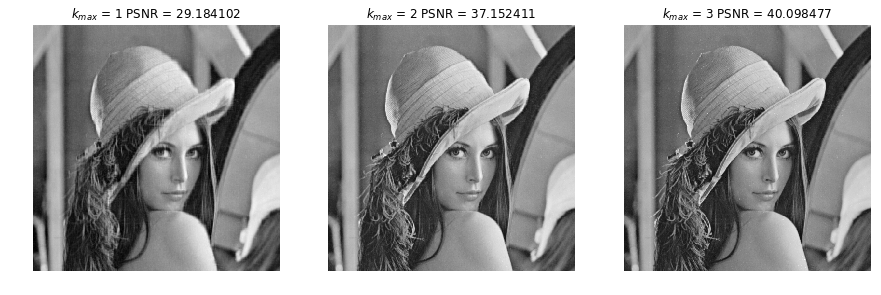

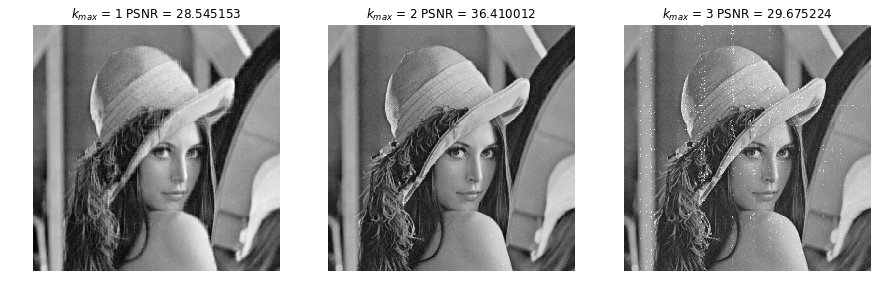

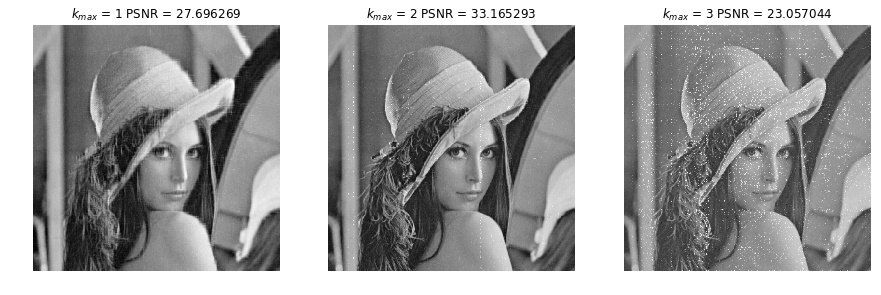

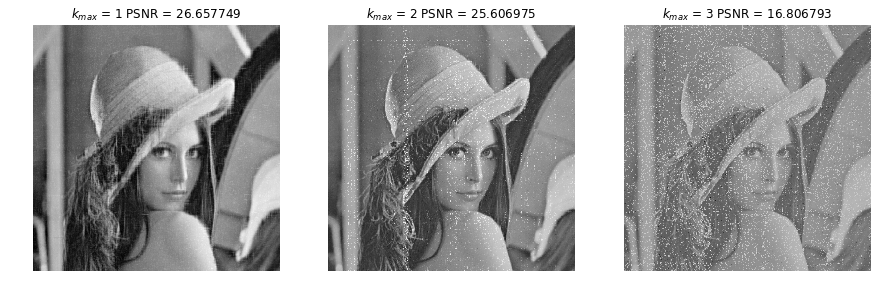

In [556]:
try:
    os.mkdir('results')
except:
    _

orig_img = Image.open("lena512.bmp")
Uorig = util.img_as_float64(np.array(orig_img))
As = []
Es = []
psnrs = {}
amounts = [0.05, 0.1, 0.15, 0.2]
for amount in amounts:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    for k_max in [1, 2, 3]:
        Ucorr = util.random_noise(Uorig, mode='salt', amount=amount)
        A, E = ADM(Ucorr, max_iter=k_max)
        As.append(A)
        Es.append(E)
        psnrs[(amount, k_max)] = PSNR(Uorig, A)
        ax[k_max-1].imshow(A, 'gray')
        ax[k_max-1].set_title('$k_{max}$ = ' + str(k_max) + ' PSNR = ' + '{:2f}'.format(psnrs[(amount, k_max)]))
        ax[k_max-1].axis('off')
    plt.savefig('./results/Noise_density={}.png'.format(amount), dpi=600)

## Plotting dependency PSNR on spasity of the noise for different k_max

ADM k = 0 Error is: 7.035973907935759e-09
ADM k = 0 Error is: 6.961796677438418e-09
ADM k = 0 Error is: 9.963143524144071e-09
ADM k = 0 Error is: 9.795892986927705e-09
ADM k = 0 Error is: 9.5535868449404e-09
ADM k = 0 Error is: 9.757865624889146e-09
ADM k = 0 Error is: 9.523518307296544e-09
ADM k = 0 Error is: 9.405175574379753e-09
ADM k = 0 Error is: 9.168489488386871e-09
ADM k = 0 Error is: 9.067397523793487e-09
ADM k = 0 Error is: 9.381420234692654e-09
ADM k = 0 Error is: 9.418904855308316e-09
ADM k = 0 Error is: 8.858555532144656e-09
ADM k = 0 Error is: 8.978223642376006e-09
ADM k = 0 Error is: 9.178407566119113e-09
ADM k = 0 Error is: 9.078164575224015e-09
ADM k = 0 Error is: 8.776973426782094e-09
ADM k = 0 Error is: 8.53029667062951e-09
ADM k = 0 Error is: 8.070872910368887e-09
ADM k = 0 Error is: 8.426820031868758e-09
ADM k = 0 Error is: 8.250864373227392e-09
ADM k = 0 Error is: 8.37936847833298e-09
ADM k = 0 Error is: 8.529039295549377e-09
ADM k = 0 Error is: 9.238432095613933e

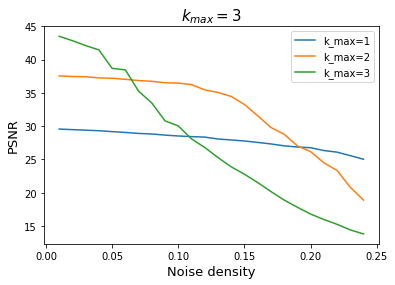

In [571]:
orig_img = Image.open("lena512.bmp")
Uorig = util.img_as_float64(np.array(orig_img))
amounts = np.arange(0.01, 0.25, 0.01)
psnrs = []
for k_max in [1, 2, 3]:
    psnrs.append([])
    for amount in amounts:
        Ucorr = util.random_noise(Uorig, mode='salt', amount=amount)
        A, E = ADM(Ucorr, max_iter=k_max)
        psnrs[-1].append(PSNR(Uorig, A))
    plt.plot(amounts, psnrs[k_max-1][:], label='$k_{max}$='+str(k_max))
plt.title('PSNR on density', fontsize=15)
plt.xlabel('Noise density', fontsize=13)
plt.ylabel('PSNR', fontsize=13)
plt.legend()
plt.savefig('./results/psnr_on_density.png', dpi=600)

## Testing on different methods

ADM k = 0 Error is: 8.593379614964887e-09
ADM k = 1 Error is: 8.252573277480748e-09
ADM k = 0 Error is: 9.646463377170025e-09
ADM k = 1 Error is: 8.588525761656914e-09
ADM k = 0 Error is: 9.64453107748404e-09
ADM k = 1 Error is: 8.516271677934883e-09


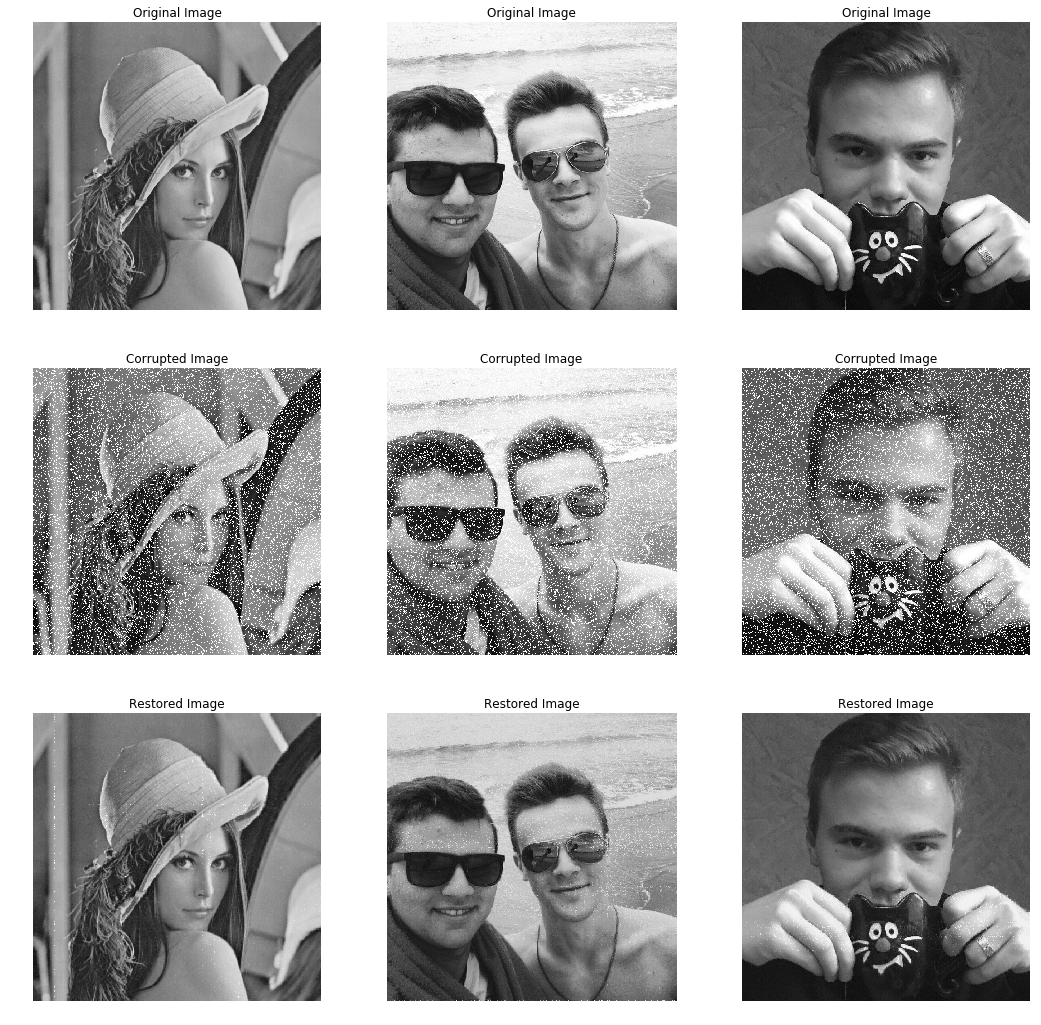

In [577]:
orig_images = ['lena512.bmp', 'kozyrsky.jpg', 'skuratov.jpg']
fig, ax = plt.subplots(3, 3, figsize=(18, 18))
for num, im in enumerate(orig_images):
    orig_img = Image.open(im)
    orig_img = orig_img.convert('L')
    Uorig = np.array(orig_img)
    ax[0][num].imshow(orig_img, 'gray')
    ax[0][num].set_title('Original Image')
    ax[0][num].axis('off')
    Ucorr = util.random_noise(Uorig, mode='salt', amount=0.15)
    ax[1][num].imshow(Ucorr, 'gray')
    ax[1][num].set_title('Corrupted Image')
    ax[1][num].axis('off')
    A, E = ADM(Ucorr, max_iter=2)
    ax[2][num].imshow(A, 'gray')
    ax[2][num].set_title('Restored Image')
    ax[2][num].axis('off')
plt.savefig('./results/ADM_some_pictures.png', dpi=600)

## Comparing with other methods

Here we use TV Chambolle, TV Bregman, Wavelet, Bilateral and ours ADM

ADM k = 0 Error is: 9.246252977410217e-09
ADM k = 1 Error is: 8.508799715652364e-09
ADM k = 0 Error is: 9.246252977410217e-09
ADM k = 1 Error is: 8.508799715652364e-09
ADM k = 2 Error is: 7.39281671498116e-09


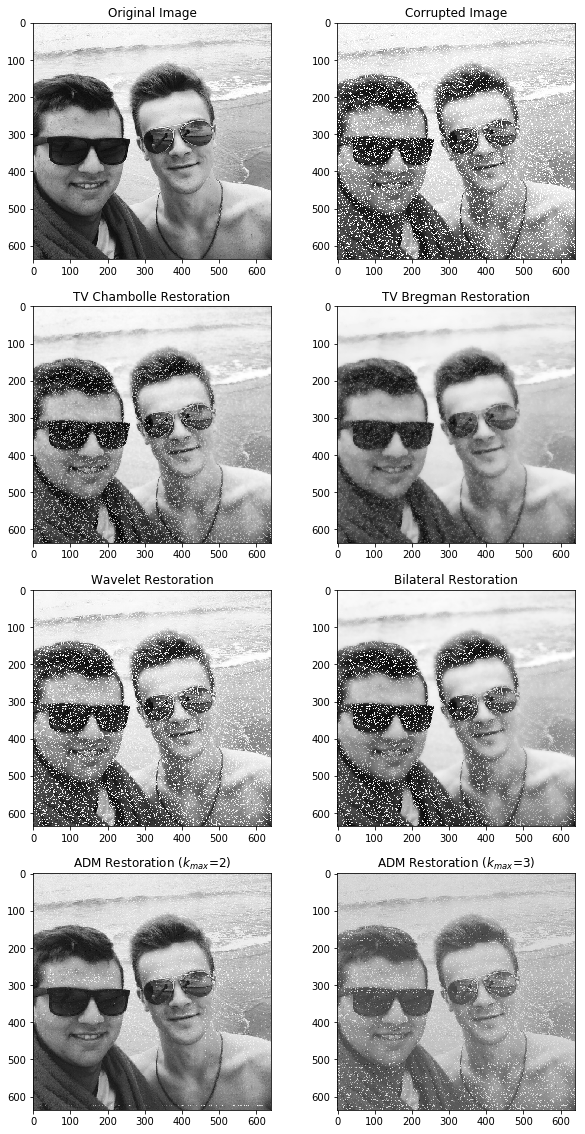

In [585]:
orig_img = Image.open('kozyrsky.jpg')
orig_img = orig_img.convert('L')
Uorig = np.array(orig_img)

Ucorr = util.random_noise(Uorig, mode='salt', amount=0.15)
chambolle_img = denoise_tv_chambolle(Ucorr, weight=0.1, eps=0.001)
bregman_img = denoise_tv_bregman(Ucorr, weight=2, max_iter=1000, eps=0.0001)
wavelet_img = denoise_wavelet(Ucorr, wavelet='db2')
bilateral_img = denoise_bilateral(Ucorr, multichannel=False, sigma_spatial=3)
adm_img_2, _ = ADM(Ucorr, max_iter=2)
adm_img_3, _ = ADM(Ucorr, max_iter=3)

fig, ax = plt.subplots(4, 2, figsize=(10, 20))
ax[0, 0].imshow(Uorig, 'gray')
ax[0, 1].imshow(Ucorr, 'gray')
ax[1, 0].imshow(chambolle_img, 'gray')
ax[1, 1].imshow(bregman_img, 'gray')
ax[2, 0].imshow(wavelet_img, 'gray')
ax[2, 1].imshow(bilateral_img, 'gray')
ax[3, 0].imshow(adm_img_2, 'gray')
ax[3, 1].imshow(adm_img_3, 'gray')

ax[0, 0].set_title('Original Image')
ax[0, 1].set_title('Corrupted Image')
ax[1, 0].set_title('TV Chambolle Restoration')
ax[1, 1].set_title('TV Bregman Restoration')
ax[2, 0].set_title('Wavelet Restoration')
ax[2, 1].set_title('Bilateral Restoration')
ax[3, 0].set_title('ADM Restoration ($k_{max}$=2)')
ax[3, 1].set_title('ADM Restoration ($k_{max}$=3)')

plt.savefig('./results/comparison.png', dpi=600)

According to the results above our ADM method with $k_{max}=2$ showed the best restoration quality.

# Conclusion

To sum up, we studied and implemented the given ADM algorithm. It shows rather good quality of restoration. For estimation the quality of restoration we used PSNR. However for each image it has the particular maximum bound of density of noise applied to this oroginal image. ADM algorithm copes well with the large-amplitude noise. We also compared ADM with several algoritms and ADM showed the best result among them. 

We can conclude that this method can be successfully applied in situations when the image was damaged by sparse noise with large amplitude.

# References

[1] Ning He, Jin-Bao Wang, Lu-lu Zhang, Ke Lu, "Convex optimization based low-rank matrix decomposition for image restoration", Neurocomputing 172, pp. 253–261, 2016.

[2]  H. Ji, S. Huang, Z. Shen, and Y. Xu, “Robust video restoration by joint sparse and low rank matrix approximation,” SIAM J. Imag. Sci., vol. 4, no. 4, pp. 1122–1142, 2011.

[3] E. Candès, X. Li, Y. Ma, and J. Wright, “Robust principal component analysis?” J. ACM, vol. 58, no. 3, pp. 1–37, 2011.

[4]Y. Peng, A. Ganesh, J. Wright, W. Xu, and Y. Ma., “RASL: Robust alignment by sparse and low-rank decomposition for linearly correlated images,” IEEE Trans. Pattern Anal. Mach. Intell., vol. 34, no. 11, pp. 2233–2246, Nov. 2012.

[5] Z. Zhang, A. Ganesh, X. Liang, and Y. Ma, “TILT: Transform-invariant low-rank textures,” Int. J. Comput. Vision, vol. 99, no. 1, pp. 1–24, Aug. 2012

[6] Z. Zhang, Y. Matsushita, and Y. Ma, “Camera calibration with lens distortion from low-rank textures,” in Proc. IEEE Conf. Comput. Vision Pattern Recognit., Jun. 2011, pp. 2321–2328.

[7] Z. Zhang, X. Liang, and Y. Ma, “Unwrapping low-rank textures on generalized cylindrical surfaces,” in Proc. Int. Conf. Comput. Vision, 2011, pp. 1347–1354.

[8] H. Mobahi, Z. Zhou, A. Y. Yang, and Y. Ma, “Holistic reconstruction of urban structures from low-rank textures,” in Proc. ICCV workshop, 2011, pp. 593–600.

[9] C. Yao, Z. Tu, and Y. Ma, “Detecting texts of arbitrary orientations in natural images,” in Proc. IEEE Conf. Comput. Vision Pattern Recognit., Jun. 2012, pp. 1083–1090.

[10]X. Liang, X. Ren, Z. Zhang, and Y. Ma, “Repairing sparse low-rank texture,” in Proc. Eur. Conf. Comput. Vision, 2012, pp. 482–495.

[11]J. Wright, A. Ganesh, S. Rao, Y. Ma, Robust principal component analysis: exact recovery of corrupted low-rank matrices via convex optimization, J. ACM (2009).